[Open in Google Colab](https://colab.research.google.com/drive/1CqkAeIhOlEEV9CkefYV2d-W8dzorwgf8?usp=sharing)

#**Attention-based-Synthetic-Battery-Data-Generation**

##Mounting the google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Changing Directory Path
Steps To Follow
Once the drive has been mounted:

1. Go to the files icon visible on the left hand side.

2. Click on the drive folder.

3. There find the folder containing the main.py file.

4. Right click on the folder and click on the folder and select the copy path option.

5. Make sure to copy and paste the path of the folder containing the main.py file in the code below.

The path of the folder in the code below is /content/drive/MyDrive/Attention-Based-Model

In [5]:
%cd /content/drive/MyDrive/Attention-Based-Model
!ls

/content/drive/MyDrive/Attention-Based-Model
data_provider  evaluate_tool.py  model.py   requirements.txt  utils.py
datasets       main.py		 pyplot.py  results


## Installing The Required Tools

In [3]:
!pip install -r requirements.txt

## Running The Main Code

In [14]:
%run main.py --features M --seq_len 96 --label_len 96 --pred_len 96 --target Charge_Capacity --freq s

Args in experiment:
Namespace(is_training=True, device=0, num_workers=0, data='custom', root_path='datasets/', data_path='data.csv', features='M', target='Charge_Capacity', freq='s', seq_len=96, label_len=96, pred_len=96, embed='timeF', heads=16, d_model=100, N=10, block_nums=2, bottleneck=2, map_bottleneck=20, train_epochs=4, batch_size=32, patience=3, learning_rate=0.0005, tau=0.07, loss_weight_prediction=1.0, loss_weight_infonce=1.0, loss_weight_smooth=1.0, check_point='checkpoint')
Basisformer(
  (coefnet): Coefnet(
    (layers): ModuleList(
      (0-1): 2 x BCAB(
        (cross_attention_basis): channel_AutoCorrelationLayer(
          (query_projection): Linear(in_features=100, out_features=96, bias=True)
          (key_projection): Linear(in_features=100, out_features=96, bias=True)
          (value_projection): Linear(in_features=100, out_features=96, bias=True)
          (out_projection): Linear(in_features=96, out_features=100, bias=True)
          (attend): Softmax(dim=-1)
  

<Figure size 640x480 with 0 Axes>

## Plotting Results
#Changing Directory path
1. Once the code is run the results are stored within the records folder.

2. The records folder further contains a data folder within which there is a features folder(depending on what feature you give M, S or U).

3. Inside the features folder you can find specific folders based on prediction and sequence length that store predicted and true values in .npy files.  

4. Copy the path for one of the folders and paste it in the code below.

The path of the used in the code below is
%cd /content/drive/MyDrive/Attention-Based-Model/records/data/features_M/seq_len96,pred_len96

In [16]:
%cd /content/drive/MyDrive/Attention-Based-Model/records/data/features_M/seq_len96,pred_len96
!ls

/content/drive/MyDrive/Attention-Based-Model/records/data/features_M/seq_len96,pred_len96
checkpoint  event  predicted_params.npy  true_params.npy


In [17]:
# Importing Requirements for plotting
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

preds = np.load('predicted_params.npy') # Predicted parameters
trues = np.load('true_params.npy') # Ground truth parameters

##Generating Plots

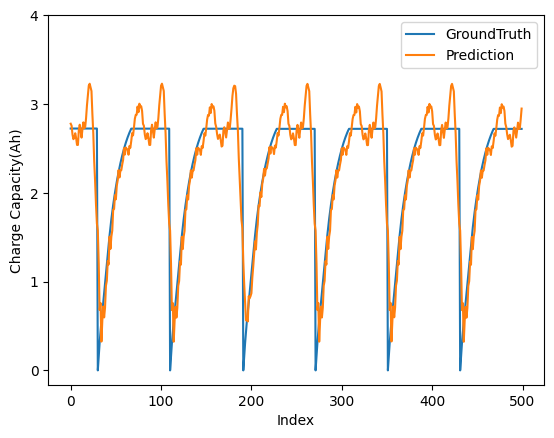

In [23]:
plt.figure()
# The below range plots the first 500 data points to get the whole plot use trues[:,1,-1] and preds[:,1,-1]
plt.plot(trues[:500,1,-1], label='GroundTruth')
plt.plot(preds[:500,1,-1], label='Prediction')
plt.yticks([0,1,2,3,4]) # Y-axis markings (can be varied depending on the requirement)
plt.xlabel('Index')
plt.ylabel('Charge Capacity(Ah)')
plt.legend()
plt.show()